In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('/content/drive/MyDrive/Practice DS/spam_ham_dataset.csv')

In [27]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [28]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [29]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [30]:
df.shape

(5171, 4)

In [31]:
df.describe(include=['O'])

,label,text
count,5171,5171
unique,2,4993
top,ham,Subject: calpine daily gas nomination\r\n>\r\n...
freq,3672,20


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [33]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [34]:
box=df.drop('text',axis=1)
box.head()

,Unnamed: 0,label,label_num
0,605,ham,0
1,2349,ham,0
2,3624,ham,0
3,4685,spam,1
4,2030,ham,0


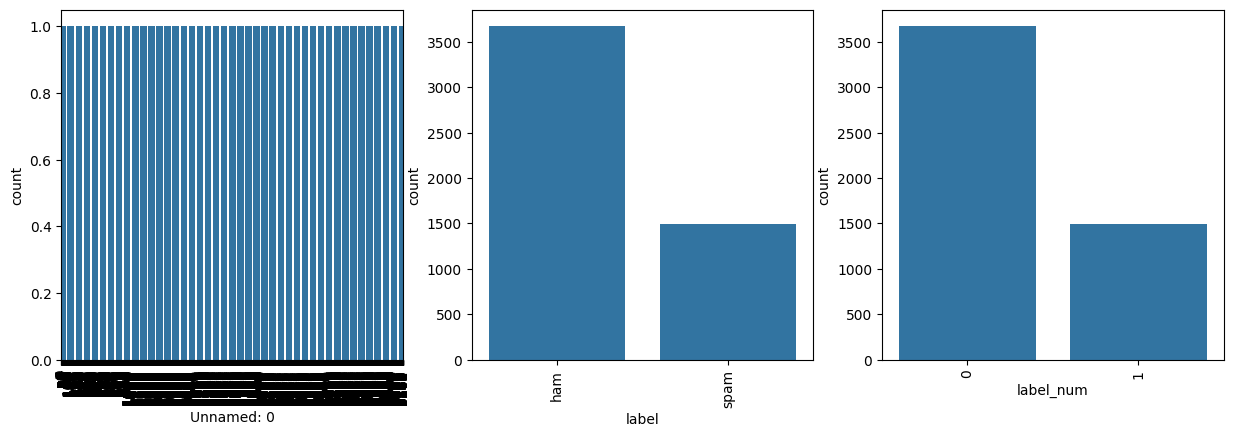

In [35]:
p=1
plt.figure(figsize=(15,10))
for i in box:
    plt.subplot(2,3,p)
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    p+=1
plt.show()

In [36]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:

# stop_words = set(stopwords.words('english'))

# df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

In [39]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    filter_words=[]
    words=word_tokenize(text)
    for word in words:
        if not word in stop_words:
            filter_words.append(word)
    return ' '.join(filter_words)


In [40]:
df['text']=df['text'].apply(remove_stopwords)

In [41]:
df.head()

,label,text,label_num
0,ham,Subject : enron methanol ; meter # : 988291 fo...,0
1,ham,"Subject : hpl nom january 9 , 2001 ( see attac...",0
2,ham,"Subject : neon retreat ho ho ho , ' around won...",0
3,spam,"Subject : photoshop , windows , office . cheap...",1
4,ham,Subject : : indian springs deal book teco pvr ...,0


In [42]:
df.rename(columns={'label_num':'class','text':'email'},inplace=True)

In [43]:
X=df.loc[:,'email']
y=df.loc[:,'class'].values


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X).toarray()


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [47]:
y_predict=classifier.predict(X_test)

In [50]:
X_predict=classifier.predict(X_train)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
cm

array([[1080,   23],
       [  55,  394]])

In [60]:
print(accuracy_score(y_test,y_predict)*100)

94.9742268041237


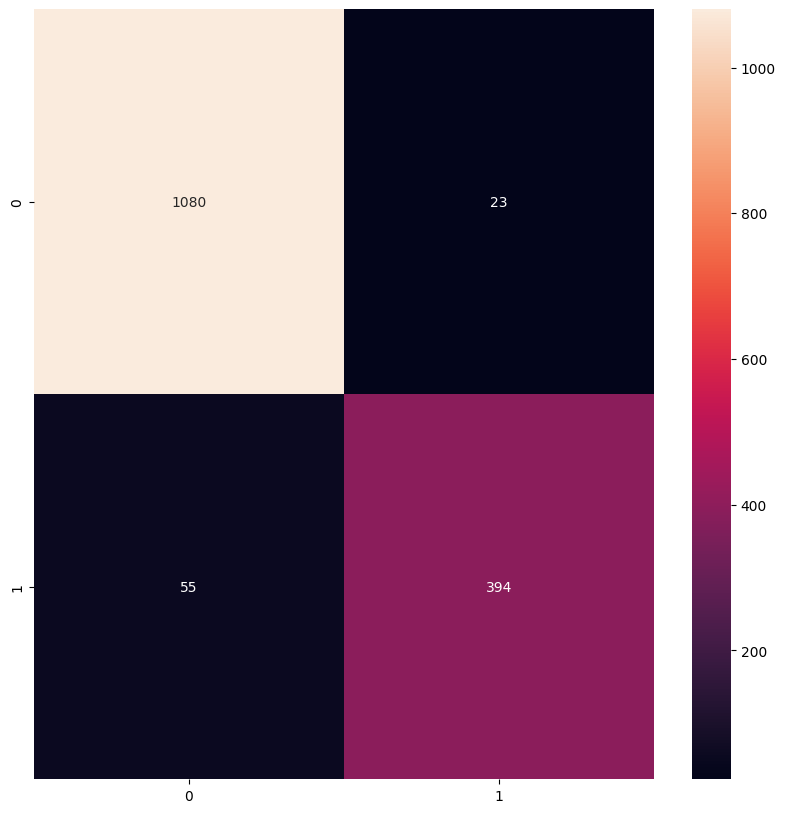

In [56]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm,annot=True,fmt='n')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = cl.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  97.29381443298969
